In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [2]:
#Loading Data using ticker for any company

company = input("Enter ticker symbol \n Ticker symbol for Apple is AAPL, for Facebook is FB etc.")

start = dt.datetime(2010,1,1)
end = dt.datetime(2021,1,1)

data = pdr.DataReader(company, 'yahoo', start, end)

Enter ticker symbol 
 Ticker symbol for Apple is AAPL, for Facebook is FB etc. TSLA


In [3]:
#Prepare Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [4]:
#Building the model

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=45, batch_size=32)

Epoch 1/45
81/81 [==============================] - 4s 46ms/step - loss: 0.0021
Epoch 2/45
81/81 [==============================] - 4s 45ms/step - loss: 7.0900e-04
Epoch 3/45
81/81 [==============================] - 3s 43ms/step - loss: 7.8667e-04
Epoch 4/45
81/81 [==============================] - 4s 43ms/step - loss: 6.9655e-04
Epoch 5/45
81/81 [==============================] - 4s 44ms/step - loss: 7.0102e-04
Epoch 6/45
81/81 [==============================] - 3s 43ms/step - loss: 6.1003e-04
Epoch 7/45
81/81 [==============================] - 3s 41ms/step - loss: 6.0610e-04
Epoch 8/45
81/81 [==============================] - 3s 43ms/step - loss: 5.7035e-04
Epoch 9/45
81/81 [==============================] - 3s 42ms/step - loss: 5.7105e-04
Epoch 10/45
81/81 [==============================] - 4s 46ms/step - loss: 5.0163e-04
Epoch 11/45
81/81 [==============================] - 3s 42ms/step - loss: 5.5960e-04
Epoch 12/45
81/81 [==============================] - 3s 42ms/step - loss: 5.47

In [5]:
#Test the model accuracy on existing data
#Load Test Data
test_start = dt.datetime(2021,1,1)
test_end = dt.datetime.now()

test_data = pdr.DataReader(company, 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)

model_inputs = scaler.transform(model_inputs)

In [6]:
#Make Predictions on Test Data
x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

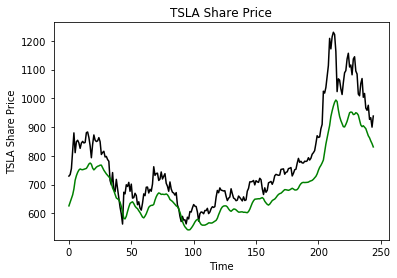

In [7]:
#Plot the test predictions
plt.plot(actual_prices, color = 'black', label =f"Actual {company} Price")
plt.plot(predicted_prices, color = 'green', label =f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f"{company} Share Price")
plt.legend
plt.show()

In [8]:
#Predicting the next day
real_data = [model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0], real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

Prediction: [[827.57916]]
